In [3]:
# Run this cell first
from datascience import * 
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

. We want to predict the sale price of houses. Thankfully, we have a data for that. Please load the house.csv data in Resources section on Piazza. In that data, there are 10 columns and one of them is "SalePrice" which is the value we want to predict. First, divide the data into two halves: train and test. First half is the train and the other half is will be used for test.

In [4]:
# write your answer here

data = Table.read_table('house.csv')
data_shuffled =data.shuffle()

train = data_shuffled.take(np.arange(0,int(data_shuffled.num_rows/2)))
test = data_shuffled.take(np.arange(int(data_shuffled.num_rows/2),data_shuffled.num_rows))
train
                    

Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
972,923203110,120,32,4500,6,5,1998,1998,320,866,0,338,1204,1204,0,0,1204,1,0,2,0,2,1,5,0,2,412,0,247,0,0,0,0,0,6,2009,162000
2089,905480180,20,60,9060,5,6,1957,2006,98,0,0,0,0,1340,0,0,1340,0,0,1,0,3,1,7,1,1,252,116,0,0,180,0,0,0,6,2007,120000
517,528456240,20,75,7862,6,5,2009,2009,0,27,0,1191,1218,1218,0,0,1218,0,0,2,0,2,1,4,0,2,676,0,102,0,0,0,0,0,9,2009,208300
2903,921205050,20,88,11577,9,5,2005,2006,382,1455,0,383,1838,1838,0,0,1838,1,0,2,0,3,1,9,1,3,682,161,225,0,0,0,0,0,9,2006,359900
2445,528315080,60,83,9545,8,5,2000,2000,322,505,0,655,1160,1205,1029,0,2234,1,0,2,1,3,1,7,1,3,768,0,50,0,0,0,0,0,6,2006,300000
225,905106170,20,65,7832,5,5,1968,1968,0,775,0,89,864,864,0,0,864,1,0,1,0,2,1,4,0,1,280,226,0,0,0,0,0,0,5,2010,137250
1319,902330010,70,50,5250,8,5,1872,1987,0,259,0,425,684,938,1215,205,2358,0,0,2,0,4,1,8,0,0,0,0,54,20,0,0,0,0,12,2008,122000
2443,528315030,60,82,9452,8,5,1997,1998,423,1074,0,322,1396,1407,985,0,2392,1,0,2,1,3,1,7,1,3,870,0,70,0,0,0,0,0,6,2006,348000
1247,535302130,20,102,9373,5,6,1953,1953,84,500,196,456,1152,1152,0,0,1152,0,0,1,1,3,1,6,0,2,636,0,0,0,0,0,0,0,5,2008,137500
963,916403010,20,130,11457,6,5,1988,1988,0,1005,0,387,1392,1412,0,0,1412,1,0,2,0,3,1,6,1,2,576,0,0,169,0,0,0,0,3,2009,175000


 For each column in the table (other than SalePrice column), calculate the pearson correlation with SalePrice **using the train data**. Print each column name and calculated pearson correlation. 

In [5]:
#write your answer here
from scipy.stats import pearsonr
sales_column =train.column('SalePrice')
train_without_sales=train.drop('SalePrice')
correlation_array=[]

for i in train_without_sales.labels:

    correlation_array.append(pearsonr(train.column(i),sales_column)[0])
corelation_table=Table().with_columns('Column Name',train_without_sales.labels,'Correlations',correlation_array).where('Correlations',are.below(0.9999999999999999999)).sort('Correlations',descending=True)

corelation_table

Column Name,Correlations
Overall Qual,0.802594
Gr Liv Area,0.731385
Total Bsmt SF,0.660563
Garage Area,0.658546
1st Flr SF,0.657356
Garage Cars,0.648168
Full Bath,0.566261
Year Built,0.556343
Mas Vnr Area,0.543661
Year Remod/Add,0.539434


 For the column that has the highest pearson correlation, calculate the slope and intersept of the linear regression line. 

In [6]:
#write your answer here**

highest_column_name =corelation_table.take(0).item(0)[0]
highest_column_name

def standard_units(any_numbers):
    
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)
def slope( label_x, label_y):
    r = pearsonr(label_x, label_y)[0]
    return r*np.std(label_y)/np.std(label_x)

def intercept( label_x, label_y):
    return np.mean(label_y) -slope( label_x, label_y)* np.mean(label_x)


slopes = slope(train.column('Overall Qual'),sales_column)
intercepts = intercept(train.column('Overall Qual'),sales_column)
slopes,intercepts






C:\Users\ABRA\Anaconda3\lib\site-packages\datascience\tables.py:193: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


(44756.9712360397, -94525.58931168637)

 Plot the regression line on a scatter plot.

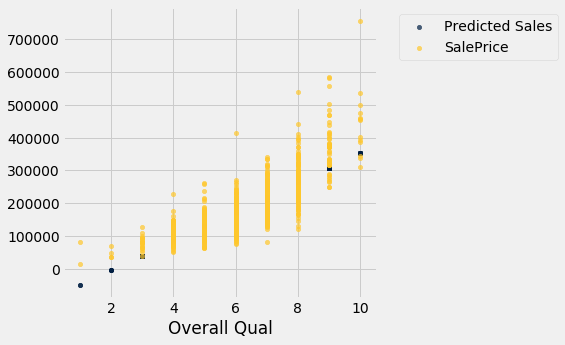

In [7]:
train_with_prediction = train.with_column('Predicted Sales',slopes*train.column('Overall Qual')+intercepts)
plot_train_with_prediction=train_with_prediction.select('Overall Qual','Predicted Sales','SalePrice')
plot_train_with_prediction.scatter('Overall Qual')

What is the root mean square error for the regression line?

In [8]:
def rmse(predict_label,y_label):
    mse = np.mean((y_label-predict_label)**2)
    return mse**0.5

regression_rmse=rmse(train_with_prediction.column('Predicted Sales'),sales_column)
regression_rmse

47990.98563309768

For each column, try to fit a non-linear regression line (ax2 + bx + c) and calculate their rmse scores.

In [9]:
def prediction_x2(a,b,c):
    x_label=train_with_prediction.column('Overall Qual')
    return a*x_label**2+b*x_label+c

def rmse_quadratic(a,b,c):
    predict_label=prediction_x2(a,b,c)
    y_label=sales_column
    mse = np.mean((y_label-predict_label)**2)
    return mse**0.5



minimize(rmse_quadratic)  
    

array([ 3502.44602014,  2672.87778074, 24123.32725448])

In [12]:
x2_prediction=prediction_x2(3502.44602014,  2672.87778074, 24123.32725448)
train_with_x2_prediction=train.with_column('Predicted Sales',x2_prediction)
x2_train_with_prediction=train_with_x2_prediction.select('Overall Qual','Predicted Sales','SalePrice')



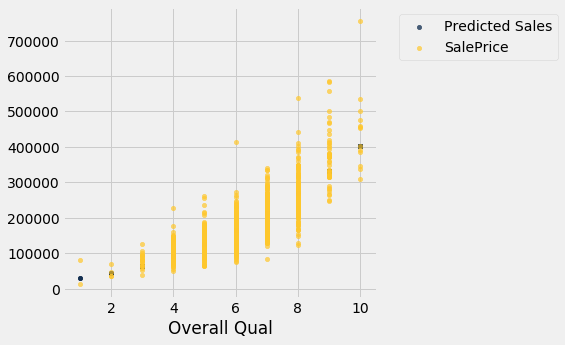

In [13]:
x2_train_with_prediction.scatter('Overall Qual')

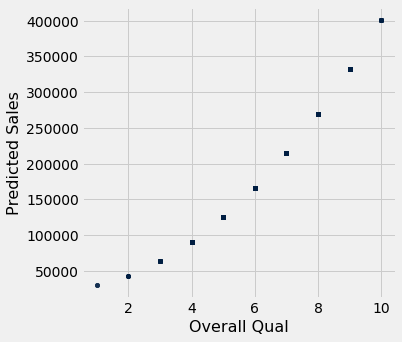

In [14]:
#to show prediction is quadratic
x2_train_with_prediction.drop('SalePrice').scatter('Overall Qual')

 On test set, find rmse value using the linear regression line you found in Question 3 

In [59]:

test_with_prediction = test.with_column('Predicted Sales',slopes*test.column('Overall Qual')+intercepts)
test_sales_column=test.column('SalePrice')

regression_rmse=rmse(test_with_prediction.column('Predicted Sales'),test_sales_column)
regression_rmse

24025129.84539051

On test set, find rmse value using the non-linear regression line you found in Question 6 with the lowest rmse score.

In [68]:
def prediction_x2_test(a,b,c):
    x_label=test_with_prediction.column('Overall Qual')
    return a*x_label**2+b*x_label+c

def rmse_quadratic_test(a,b,c):
    predict_label=prediction_x2_test(a,b,c)
    y_label=test_sales_column
    mse = np.mean((y_label-predict_label)**2)
    return mse**0.5



minimize(rmse_quadratic_test)  

array([ 3643.77862191,  2270.62161879, 21831.31009885])

In [69]:
rmse_quadratic_test(3643.77862191,  2270.62161879, 21831.31009885)

44900.99071076122